<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [52]:
##Write your code here
#checking detail data, type, and missing count
missing_data = df.isnull().sum()
df_missing_data = pd.DataFrame(missing_data, columns=['count_missing'])
df_missing_data.index.name = 'Column_Name'
#df_missing_data
df_dtype = pd.DataFrame(df.dtypes, columns=['data_types'])
df_describe = df.describe(include='all').transpose()

missing_data_merge1 = pd.merge(df_dtype, df_missing_data, on='Column_Name', how='inner')
missing_data_merge = pd.merge(missing_data_merge1, df_describe, on='Column_Name', how='inner')
missing_data_merge.to_csv("df_detail.csv", index = True)

In [40]:
def count_each_data_include_missing(column_data):
    columns = [column_data]
    for column in columns:
        group_series = df[column].value_counts(dropna=False)
        filename = "group_" + column + ".csv"
        group_series.to_csv(filename,index = True)
    return group_series

In [5]:
columns = ['Industry']
mode_value = df[column].mode()[0]
df[column].fillna(mode_value, inplace=True)

/tmp/ipykernel_529/280236459.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


In [10]:
industry_group = pd.DataFrame(df.groupby(column)[column].value_counts())
industry_group

,count
Industry,
Banking/Financial Services,1371
Computer Systems Design and Services,844
Energy,578
Fintech,1641
Government,962
Healthcare,1277
Higher Education,890
Insurance,389
"Internet, Telecomm or Information Services",1629


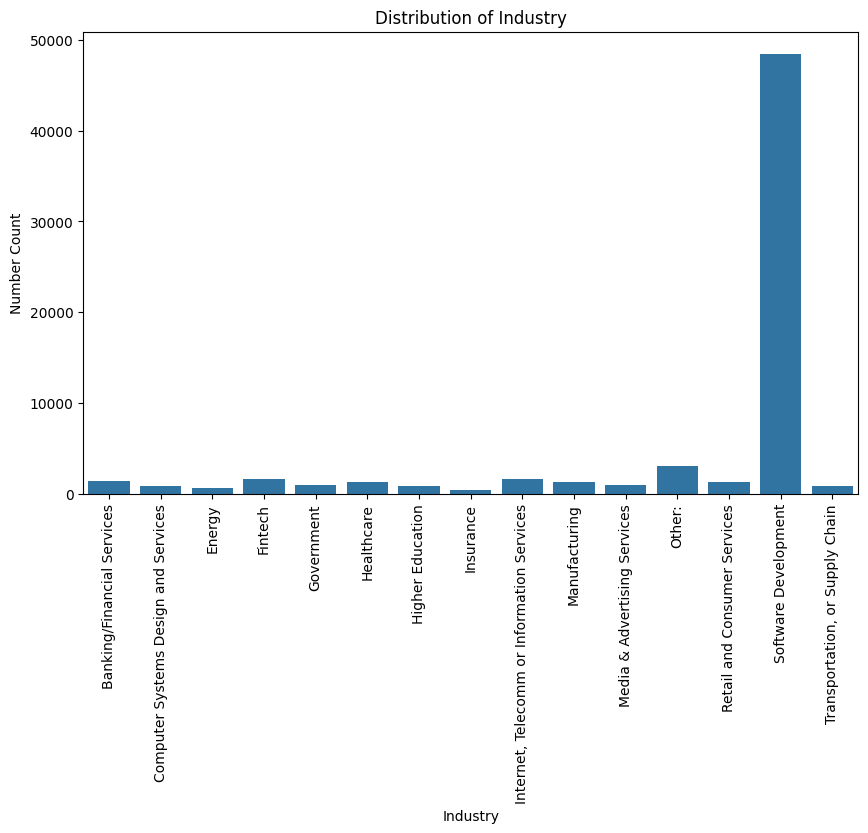

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=industry_group, x='Industry', y = 'count')

plt.title('Distribution of Industry')
plt.xlabel('Industry')
plt.ylabel('Number Count')
plt.xticks(rotation = 90)
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [14]:
##Write your code here
df['ConvertedCompYearly'].describe()

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

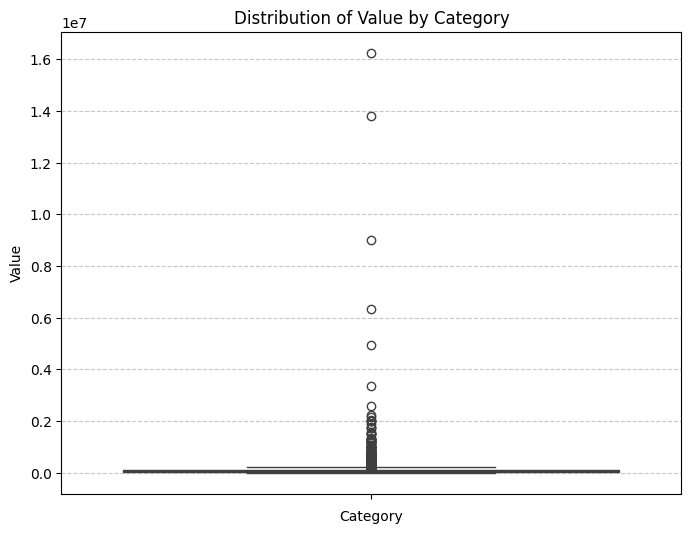

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='ConvertedCompYearly', data=df)
plt.title('Distribution of Value by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [16]:
##Write your code here
df['ConvertedCompYearly'].describe()

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [21]:
##Write your code here
mean_converted_comp = df['ConvertedCompYearly'].mean()
std_converted_comp = df['ConvertedCompYearly'].std()
outlier_threshold = mean_converted_comp + (3 * std_converted_comp)

df_cleaned = df[df['ConvertedCompYearly'] <= outlier_threshold].copy()
df_cleaned

Column_Name,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,65.0,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.0,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,41181,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,...,0.0,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,44640.0,NaN
41184,41185,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Freel...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books,...,20.0,10.0,20.0,15.0,0.0,0.0,Appropriate in length,Easy,170000.0,9.0
41185,41186,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,116844.0,NaN
41186,41187,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Books;Written Tutorial...,...,20.0,25.0,15.0,5.0,5.0,0.0,Appropriate in length,Easy,12000.0,3.0


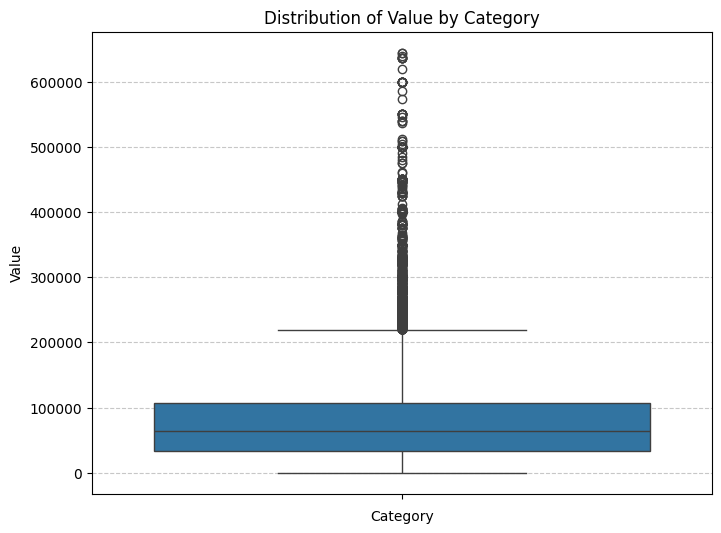

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='ConvertedCompYearly', data=df_cleaned)
plt.title('Distribution of Value by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [47]:
import numpy as np

In [43]:
##Write your code here
count_each_data_include_missing('Age')

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

In [51]:
df_age = pd.read_csv('group_Age.csv')

age_midpoints_map = {
    "25-34 years old": (25 + 34) / 2, # 29.5
    "35-44 years old": (35 + 44) / 2, # 39.5
    "18-24 years old": (18 + 24) / 2, # 21.0
    "45-54 years old": (45 + 54) / 2, # 49.5
    "55-64 years old": (55 + 64) / 2, # 59.5
    "Under 18 years old": 17,         # Assuming a representative age for 'under 18'
    "65 years or older": 65,          # Assuming a representative age for '65 or older'
    "Prefer not to say": np.nan       # Cannot be converted to a numerical age
}

df['Age_Numeric'] = df['Age'].map(age_midpoints_map)
df['Age_Numeric']

0        17.0
1        39.5
2        49.5
3        21.0
4        21.0
         ... 
65432    21.0
65433    29.5
65434    29.5
65435    21.0
65436    21.0
Name: Age_Numeric, Length: 65437, dtype: float64

In [54]:
corr_Age_JobSat = df['Age_Numeric'].corr(df['JobSat'])
corr_Age_JobSat

np.float64(0.06944695996984954)

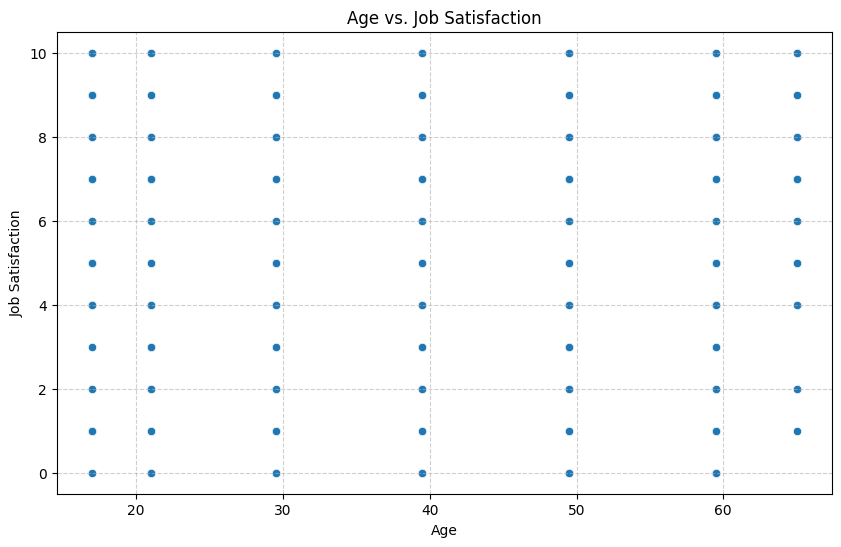

In [55]:
plt.figure(figsize=(10, 6))
# Create a basic scatter plot
sns.scatterplot(data=df, x='Age_Numeric', y='JobSat')
plt.title('Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

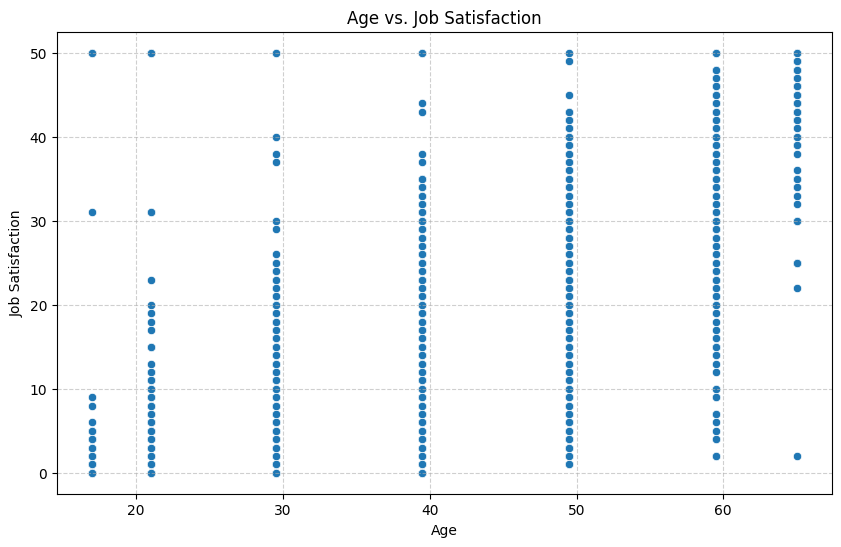

In [58]:
plt.figure(figsize=(10, 6))
# Create a basic scatter plot
sns.scatterplot(data=df, x='Age_Numeric', y='WorkExp')
plt.title('Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
